In [1]:
from timeit import default_timer
import numpy as np
import matplotlib.pyplot as plt

# make the interpolator then call it

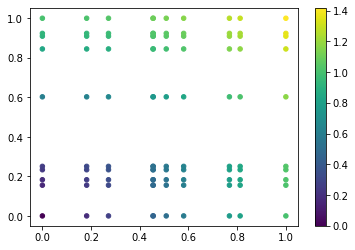

In [9]:
# xt = np.linspace(0,1,10)
# yt = np.linspace(0,1,8)

xt = np.random.random(10)
yt = np.random.random(10)
xt = np.sort(xt)
yt = np.sort(yt)
xt[0] = 0
xt[-1] = 1
yt[0] = 0
yt[-1] = 1

xx,yy = np.meshgrid(xt,yt)

def f(x,y):
    return np.sqrt(x**2 + y**2)

data = f(xx,yy)

fig,ax = plt.subplots()
sc = ax.scatter(xx,yy,c=data,s=20)
cb = plt.colorbar(sc,ax=ax)

In [38]:
from scipy.interpolate import RegularGridInterpolator

st = default_timer()
interp = RegularGridInterpolator((yt,xt),data)
end = default_timer()
print(f"time to create interpolator = {end-st}")

nrpt = 100

calltimes = []
for i in range(nrpt):
    x = np.random.random()
    y = np.random.random()
    st = default_timer()
    f55 = interp([y,x])
    end = default_timer()
    calltimes.append(end-st)
print(f"avg time to call interpolator = {np.mean(calltimes)}")

def call_interp(x,y):
    # np.stack is like (zip), so call interp on [[y0,x0],[y1,x1],[y2,x2],...] for lists
    # or for grids it would create:
    # [[[y0,x0], [y0,x1], [y0,x2], ..., [y0,xn]],
    #  [[y1,x0], [y1,x1], ..., [y1,xn]],
    #  ...
    #  [[yn,x0], [yn,x1], ..., [yn,xn]]]
    return interp(np.stack([y,x],axis=-1))

functimes = []
for i in range(nrpt):
    x = np.random.random()
    y = np.random.random()
    st = default_timer()
    f55 = call_interp(x,y)
    end = default_timer()
    functimes.append(end-st)
print(f"avg time to call interp inside func = {np.mean(functimes)}")

X = np.linspace(0,1,100)
Y = np.linspace(0,1,100)
xg,yg = np.meshgrid(X,Y)

#### this takes too long!
# looptimes = []
# for n in range(nrpt):
#     st = default_timer()
#     arr = np.zeros_like(xg)
#     for j in range(100):
#         for i in range(100):
#             x = xg[j,i]
#             y = yg[j,i]
#             arr[j,i] = call_interp(x,y)
#     end = default_timer()
#     looptimes.append(end-st)
# print(f"avg time to loop through interps = {np.mean(looptimes)}")
# print(f"                                 = {np.mean(looptimes)/(100*100)} per loop")

arrtimes = []
for n in range(nrpt):
    st = default_timer()
    arr = call_interp(xg,yg)
    end = default_timer()
    arrtimes.append(end-st)
print(f"avg time to interp array = {np.mean(arrtimes)}")            


time to create interpolator = 0.0008075400000961963
avg time to call interpolator = 0.00021774568999944678
avg time to call interp inside func = 0.00015856912000117518
acg time to interp array = 0.0010353818300063722


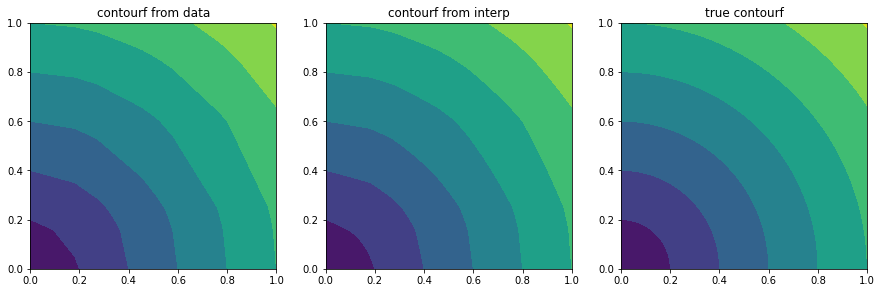

In [46]:
fig,axs = plt.subplots(1,3,figsize=(15,5))

X = np.linspace(0,1,100)
Y = np.linspace(0,1,100)
xg,yg = np.meshgrid(X,Y)

ax = axs[0]
ax.set_title("contourf from data")
im = ax.contourf(xt,yt,data)

ax = axs[1]
ax.set_title("contourf from interp")
im = ax.contourf(xg,yg,call_interp(xg,yg))

ax = axs[2]
ax.set_title("true contourf")
im = ax.contourf(xg,yg,f(xg,yg))

for ax in axs:
    ax.set(aspect='equal')

In [55]:
X = np.linspace(0,1,5)
Y = np.linspace(0,1,5)

XX,YY = np.meshgrid(X,Y)

print(np.stack([XX,YY],axis=-1).shape)
np.stack([XX,YY],axis=-1)

(5, 5, 2)


array([[[0.  , 0.  ],
        [0.25, 0.  ],
        [0.5 , 0.  ],
        [0.75, 0.  ],
        [1.  , 0.  ]],

       [[0.  , 0.25],
        [0.25, 0.25],
        [0.5 , 0.25],
        [0.75, 0.25],
        [1.  , 0.25]],

       [[0.  , 0.5 ],
        [0.25, 0.5 ],
        [0.5 , 0.5 ],
        [0.75, 0.5 ],
        [1.  , 0.5 ]],

       [[0.  , 0.75],
        [0.25, 0.75],
        [0.5 , 0.75],
        [0.75, 0.75],
        [1.  , 0.75]],

       [[0.  , 1.  ],
        [0.25, 1.  ],
        [0.5 , 1.  ],
        [0.75, 1.  ],
        [1.  , 1.  ]]])

In [54]:
X = np.linspace(0,1,2)
Y = np.linspace(0,1,3)
Z = np.linspace(0,1,4)

ZZ,XX,YY = np.meshgrid(Z,Y,X,indexing='ij')

np.stack([ZZ,YY,XX],axis=-1).shape

(4, 3, 2, 3)

In [53]:
np.stack([ZZ,XX,YY],axis=-1)

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 1.        ]],

        [[0.        , 0.5       , 0.        ],
         [0.        , 0.5       , 1.        ]],

        [[0.        , 1.        , 0.        ],
         [0.        , 1.        , 1.        ]]],


       [[[0.33333333, 0.        , 0.        ],
         [0.33333333, 0.        , 1.        ]],

        [[0.33333333, 0.5       , 0.        ],
         [0.33333333, 0.5       , 1.        ]],

        [[0.33333333, 1.        , 0.        ],
         [0.33333333, 1.        , 1.        ]]],


       [[[0.66666667, 0.        , 0.        ],
         [0.66666667, 0.        , 1.        ]],

        [[0.66666667, 0.5       , 0.        ],
         [0.66666667, 0.5       , 1.        ]],

        [[0.66666667, 1.        , 0.        ],
         [0.66666667, 1.        , 1.        ]]],


       [[[1.        , 0.        , 0.        ],
         [1.        , 0.        , 1.        ]],

        [[1.        , 0.5       , 